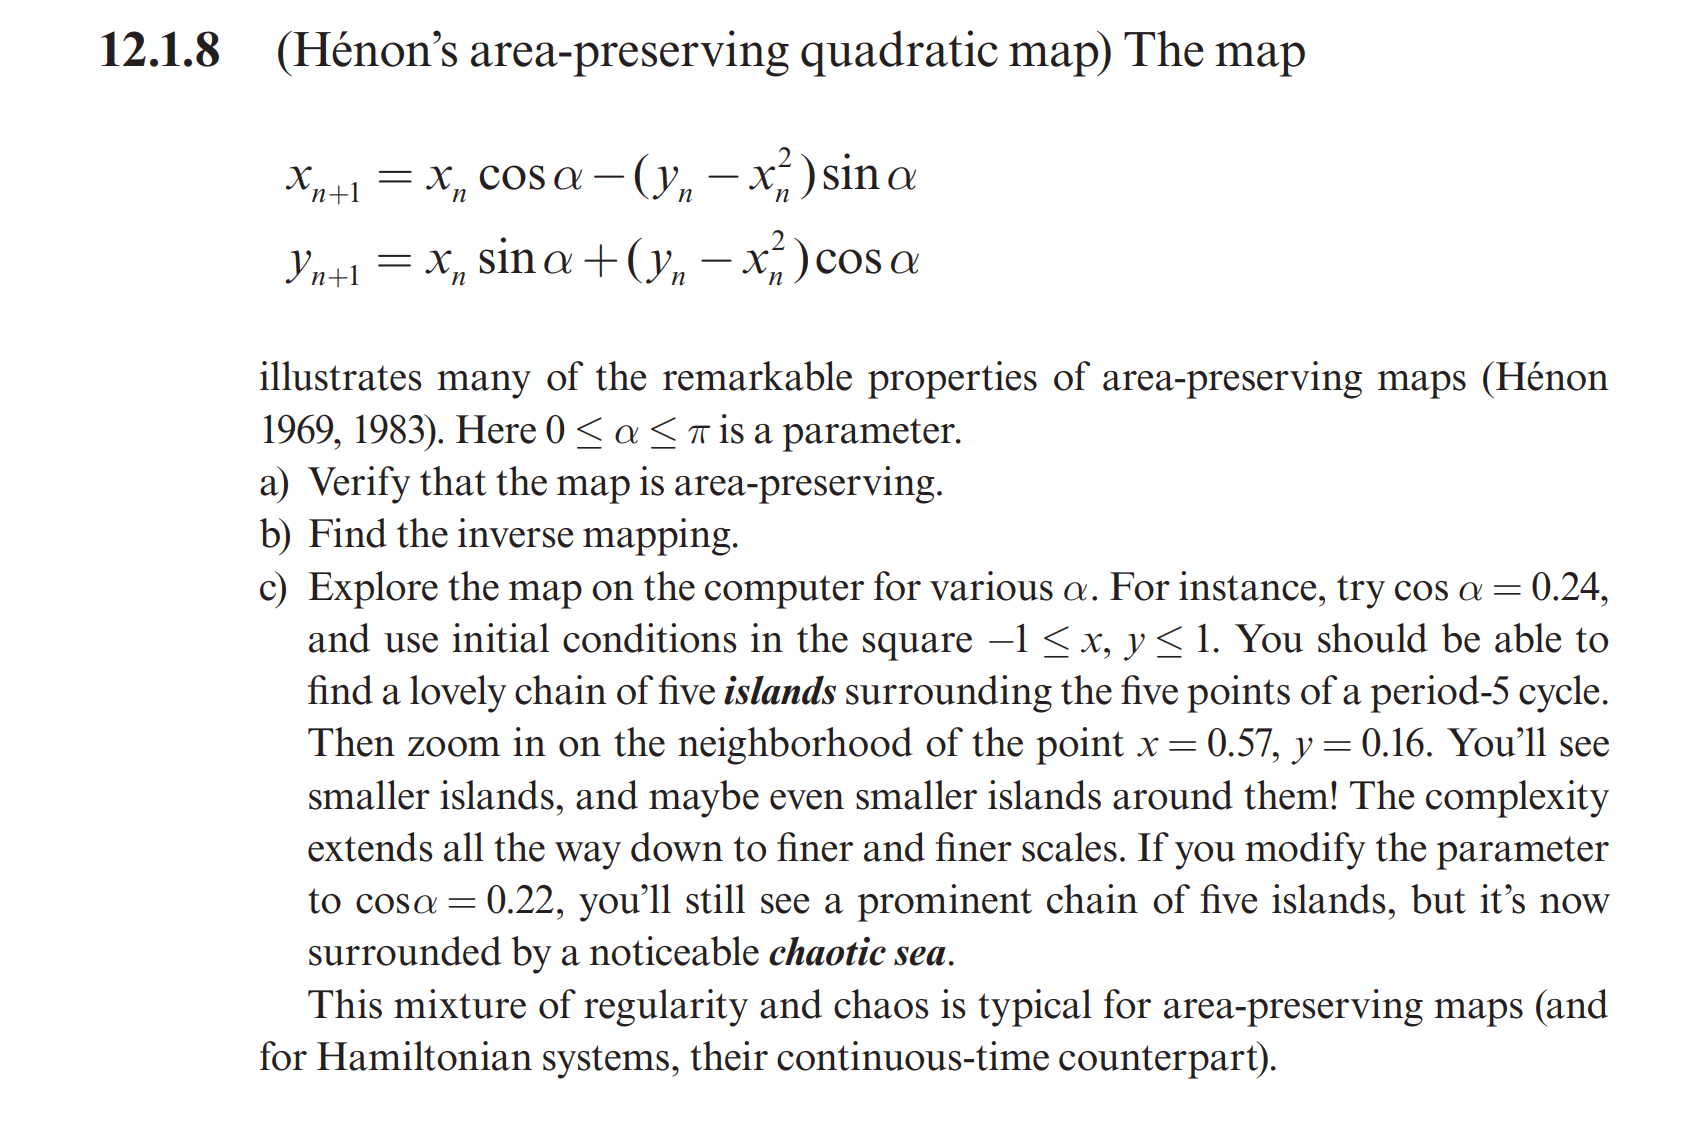

In [1]:
from sympy import init_session, symbols
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
#import theano as T
import numba as nb
from sympy import *
a,b,c,x,y = symbols('a b c x y', positive=True)
r, theta, phi = symbols('r theta phi', positive=True)


In [2]:
def HenonMap2(a,x,y):
    return x*cos(a)-(y-x*x)*sin(a), x*sin(a)+(y-x*x)*cos(a)
HenonMap2(a,x,y)

(x*cos(a) - (-x**2 + y)*sin(a), x*sin(a) + (-x**2 + y)*cos(a))

In [3]:
# Map dependent parameters
a1 = np.arccos(.24)
iterates = 1000
xtemp = .1
ytemp = .1
def make_points(xtemp=xtemp, ytemp=ytemp, a1=a1, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(iterates):
        xtemp, ytemp = HenonMap2(a1,xtemp,ytemp)
   #     x.append( np.mod(xtemp,np.pi) )
   #     y.append( np.mod(ytemp,np.pi) )
        x.append(xtemp)
        y.append(ytemp)
    return np.array(x),np.array(y)

(-1.5, 1.5)

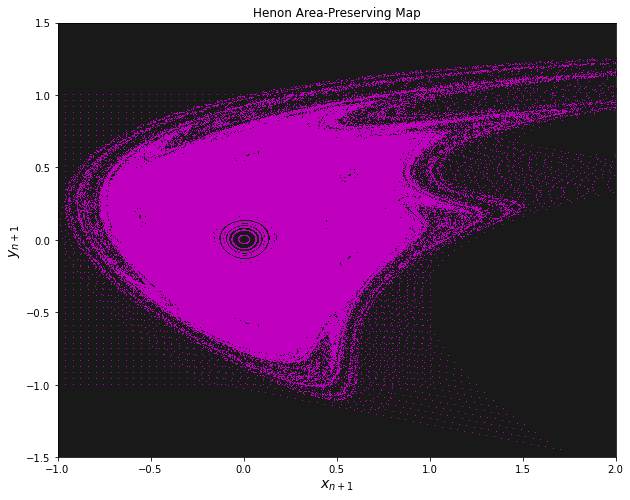

In [4]:
domain = np.linspace(-1,1,50)
X_next = [] 
Y_next = []
for xt in domain:
    for yt in domain:
        X, Y = make_points(xt,yt)
        X_next.append(X)
        Y_next.append(Y)
X_next = np.array(X_next) #This is a gotcha... works only with array, not list...
Y_next = np.array(Y_next)

# Plot the time series
N = 20
colors = np.random.rand(N)
fig, ax1= plt.subplots(1,1,figsize=(10,8))
ax1.set_title(r'Henon Area-Preserving Map')
ax1.set_facecolor(plt.cm.gray(.1))
ax1.set_xlabel(r'$x_{n+1}$',size=14)
ax1.set_ylabel(r'$y_{n+1}$',size=14)
ax1.plot(X_next,Y_next,'m,')
ax1.set_xlim(-1.,2.)
ax1.set_ylim(-1.5,1.5)